# Racing Analysis

In [16]:
from capo.load_datasets import get_tasks
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
dataset = "agnews"
optimizer = "CAPO"  # "EvoPromptGA" # CAPO
model = "mistral"
seed = 42

In [4]:
task, _, _ = get_tasks(
    dataset_name=dataset,
    optimizer_name=optimizer,
    seed=seed,
    block_size=30,
)

init_prompts = task.initial_prompts;

C:\Users\schla\git\capo\capo\load_datasets.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "input"] = df[config.input]
C:\Users\schla\git\capo\capo\load_datasets.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "target"] = df[config.target]
C:\Users\schla\git\capo\capo\load_datasets.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

## Initial Prompts Analysis

In [5]:
path = glob(f"../results/{dataset}/{model}/{optimizer}/seed{seed}/*/*/step_results_eval.csv")[0]
df = pd.read_csv(path)

In [7]:
df["contains_init"] = df["prompt"].apply(lambda x: any([prompt in x for prompt in init_prompts]))

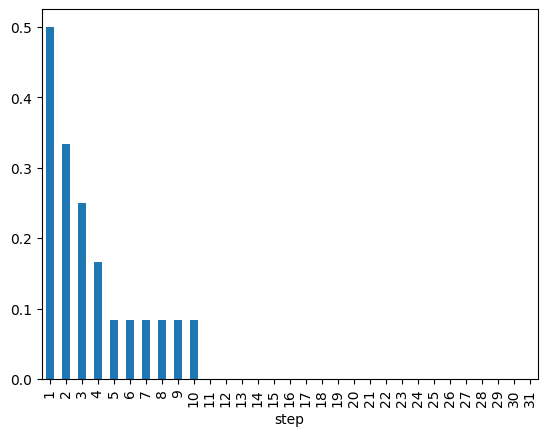

In [8]:
df.groupby("step").mean(numeric_only=True)["contains_init"].plot(kind="bar");

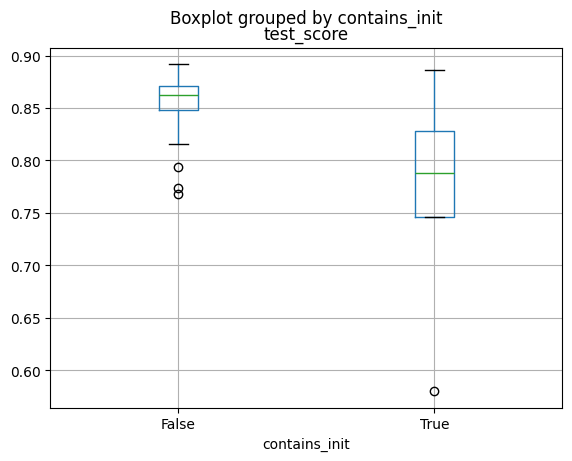

In [9]:
# boxplot
df.groupby("prompt").first().boxplot(column="test_score", by="contains_init");

In [10]:
# get the init prompt that dominates
df[df["contains_init"]].groupby("prompt", as_index=False).mean(numeric_only=True)[
    ["prompt", "test_score"]
].sort_values("test_score", ascending=False)

,prompt,test_score
1,"Given this news article, what category does it...",0.886
0,"Based on the content of this news article, cla...",0.828
5,You are a news categorization system. Read the...,0.828
3,Please read this news article carefully and as...,0.748
4,Read the following news text and determine whi...,0.746
2,"In our dataset of news articles, each piece mu...",0.580


## Prompt Survival Analysis

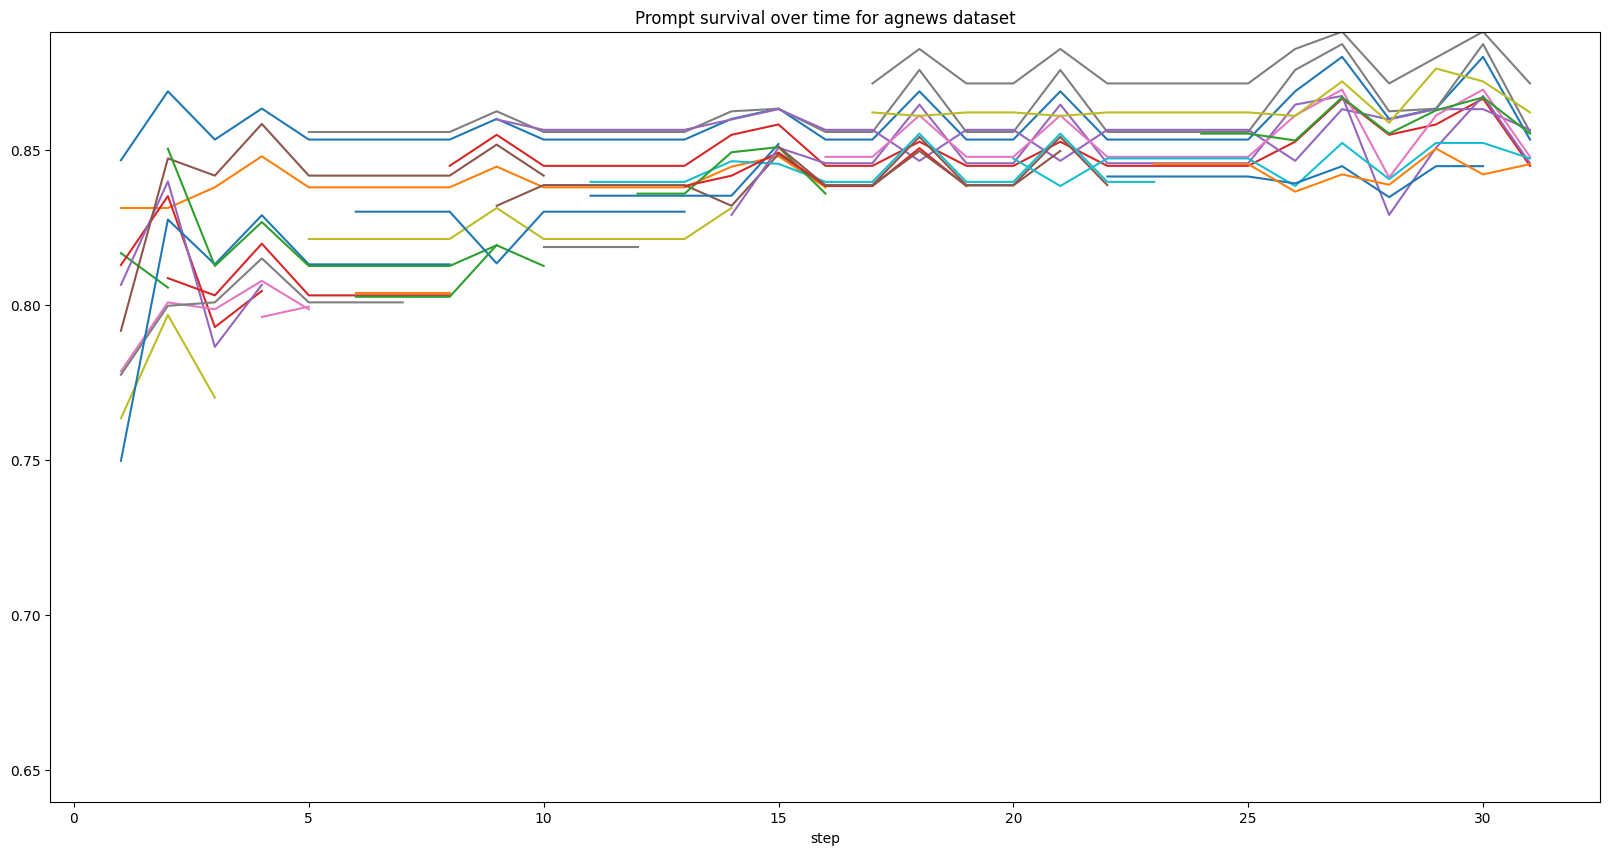

In [28]:
df = pd.read_csv(path)

fig, ax = plt.subplots(figsize=(20, 10))
for prompt in df["prompt"].unique():
    df[df["prompt"] == prompt].plot(x="step", y="score", ax=ax)

# remove the legend
ax.get_legend().remove()

# set minimum and maximum y-axis
ax.set_ylim(min(df["score"]), max(df["score"]))

ax.set_title(f"Prompt survival over time for {dataset} dataset")

plt.show()

## Block Score Analysis

In [29]:
path = glob(f"../results/{dataset}/{model}/{optimizer}/seed{seed}/*/*/prompt_scores.csv")[0]
promt_scores_df = pd.read_csv(path)

In [30]:
promt_scores_df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9
0,Analyze the given news article and determine t...,0.866667,0.933333,0.800000,0.900000,0.733333,0.900000,0.933333,0.800000,0.766667,0.933333
1,Analyze the given news article and determine t...,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Analyze the given news article and identify th...,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Analyze the provided news article and determin...,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Analyze the provided news article and determin...,0.633333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
131,You are tasked with categorizing a set of news...,0.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,You are tasked with categorizing news articles...,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,You are tasked with categorizing news articles...,0.766667,0.900000,0.800000,0.900000,0.766667,0.733333,0.833333,0.700000,0.800000,0.833333
134,You are tasked with categorizing news articles...,0.766667,0.900000,0.866667,0.766667,0.766667,0.866667,0.900000,0.933333,0.700000,0.833333
